## How to shoot a higher percentage from 3 in the NBA

#### Using machine learning

In [34]:
#Setting up Libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.metrics import accuracy_score

print("Libraries imported.")

Libraries imported.


In [2]:
three_df = pd.read_csv(r'C:\Users\Todo\Desktop\NBA_Projects\NBA_Exploratory\3P%_Table.csv')

In [3]:
three_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P▼,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,James Harden\hardeja01,SG,30,HOU,64,64,2352,629,1437,0.438,280,798,0.351,349,639,0.546,0.535,654,760,0.861,68,342,410,474,115,56,281,221,2192
1,2,Buddy Hield\hieldbu01,SG,27,SAC,67,44,2115,471,1108,0.425,252,647,0.389,219,461,0.475,0.539,113,134,0.843,57,259,316,206,63,17,160,157,1307
2,3,Duncan Robinson\robindu01,SF,25,MIA,68,63,2034,298,639,0.466,252,565,0.446,46,74,0.622,0.664,56,61,0.918,10,209,219,94,35,17,62,184,904
3,4,Damian Lillard\lillada01,PG,29,POR,61,61,2269,555,1223,0.454,236,603,0.391,319,620,0.515,0.550,411,463,0.888,30,236,266,486,61,22,179,106,1757
4,5,Devonte' Graham\grahade01,PG,24,CHO,63,53,2211,368,963,0.382,218,585,0.373,150,378,0.397,0.495,191,233,0.820,42,170,212,471,62,15,181,115,1145


In [40]:
#Going to try Linear regression
#Split 3P% in to good and bad if you want logistic

target = three_df['3P%'].values
#target = pd.cut(target,2,labels=[0,1])

In [41]:
features = three_df[['Age', 'MP', '2PA', '3PA', 'FTA']].values

In [42]:
#Need to make the model first
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
#lg = LogisticRegression()
lm = linear_model.LinearRegression()

#model = lg.fit(X_train, y_train)
model = lm.fit(X_train, y_train)

predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

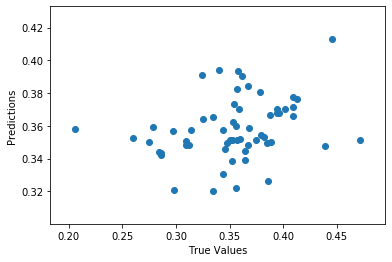

In [45]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [46]:
print ("Score:", model.score(X_test, y_test))

Score: 0.059896638576437684


In [ ]:
#Very bad score
#Need to find out what good variables there are for 3p%

In [53]:
#Lets make it among top 100 shooters, by volumne
t_100 = three_df.head(100)
t_100.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P▼,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,James Harden\hardeja01,SG,30,HOU,64,64,2352,629,1437,0.438,280,798,0.351,349,639,0.546,0.535,654,760,0.861,68,342,410,474,115,56,281,221,2192
1,2,Buddy Hield\hieldbu01,SG,27,SAC,67,44,2115,471,1108,0.425,252,647,0.389,219,461,0.475,0.539,113,134,0.843,57,259,316,206,63,17,160,157,1307
2,3,Duncan Robinson\robindu01,SF,25,MIA,68,63,2034,298,639,0.466,252,565,0.446,46,74,0.622,0.664,56,61,0.918,10,209,219,94,35,17,62,184,904
3,4,Damian Lillard\lillada01,PG,29,POR,61,61,2269,555,1223,0.454,236,603,0.391,319,620,0.515,0.550,411,463,0.888,30,236,266,486,61,22,179,106,1757
4,5,Devonte' Graham\grahade01,PG,24,CHO,63,53,2211,368,963,0.382,218,585,0.373,150,378,0.397,0.495,191,233,0.820,42,170,212,471,62,15,181,115,1145


In [57]:
features = t_100[['Age', '2PA','3PA', 'FTA']].values
target = t_100['3P%'].values
target = pd.cut(target,3,labels=["bad","medium","good"])

In [58]:
target.value_counts()

bad       24
medium    57
good      19
dtype: int64

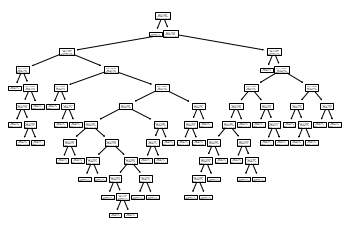

In [59]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)
tree.plot_tree(clf); 

### For the most part, higher 3p% tends with higher 2PA
### This could be due to more open looks when attacking the basket.